<a href="https://colab.research.google.com/github/kaindoh/Titanic-project/blob/master/Titanic_Survival_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
This a classification problem on titanic dataset to predict the chances of the passenger survival.

# Problem Statement

1.   To perfom K-nearest neighbor classification.
2.   To use various splits like 80 - 20,70 - 30 and 60 - 40 etc
3.   To Optimize the K-nearest clasifier so that it can reach its best perfomance


# Metrics of Success

*   Accuracy
*   ConfusionMatrix





# Importing libraries and loading dataset

In [0]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid",context='notebook')
from sklearn.model_selection import train_test_split,KFold,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler,Normalizer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,confusion_matrix,classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [0]:
# Loading dataset for train and test
df = pd.read_csv("train.csv")
df1 = pd.read_csv("test (2).csv")

In [68]:
# Previwing the train datasets
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [69]:
# Previwing the test datasets
df1.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


# Explorative data analysis

In [70]:
# Previewing the information of the dataset
#
print("train dataset info")
print("********************")
print(df.info())
print("test dataset info")
print("********************")
print(df1.info())

train dataset info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
test dataset info
********************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418

This shows presence of missing values in some columns

In [71]:
# Previewing the statistical information of the dataset
#
print("train dataset stastical information")
print("********************")
print(df.describe())
print("test dataset stastical information")
print("********************")
print(df1.describe())

train dataset stastical information
********************
       PassengerId    Survived      Pclass  ...       SibSp       Parch        Fare
count   891.000000  891.000000  891.000000  ...  891.000000  891.000000  891.000000
mean    446.000000    0.383838    2.308642  ...    0.523008    0.381594   32.204208
std     257.353842    0.486592    0.836071  ...    1.102743    0.806057   49.693429
min       1.000000    0.000000    1.000000  ...    0.000000    0.000000    0.000000
25%     223.500000    0.000000    2.000000  ...    0.000000    0.000000    7.910400
50%     446.000000    0.000000    3.000000  ...    0.000000    0.000000   14.454200
75%     668.500000    1.000000    3.000000  ...    1.000000    0.000000   31.000000
max     891.000000    1.000000    3.000000  ...    8.000000    6.000000  512.329200

[8 rows x 7 columns]
test dataset stastical information
********************
       PassengerId      Pclass         Age       SibSp       Parch        Fare
count   418.000000  418.000000

In [72]:
# Getting the names of the columns

print("names of the columns of the train dataset ")
print("********************")
print(df.columns)
print("names of the columns of the test dataset ")
print("********************")
print(df1.columns)

names of the columns of the train dataset 
********************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
names of the columns of the test dataset 
********************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


**Note : *For the Visualization ,i will use the train set because it has the target variable ,hence i can get relationships* easily**

In [0]:
# plt.xlabel(fontsize=15)
# plt.ylabel(fontsize=15)
# plt.title(fontsize=16,color="green")

In [74]:
# Getting unique values for the train dataset
columns = df.columns
for i in columns:
  print(i)
  print(df[i].unique())
  print("******************")
  print("\n")

PassengerId
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 24

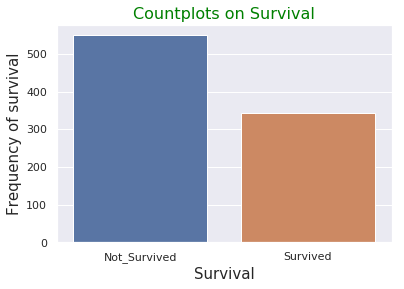

In [75]:
# viewing the bar plots of those who survived and those who dint
sns.countplot(df['Survived'])
survival = ["Not_Survived","Survived"]
plt.xlabel("Survival",fontsize=15)
plt.ylabel("Frequency of survival",fontsize=15)
plt.title("Countplots on Survival",fontsize=16,color="green")
plt.xticks(df['Survived'], survival, )
plt.show()

This shows that poeple who boarded the ship ,the proportion of people who dint survive were more than those who survived

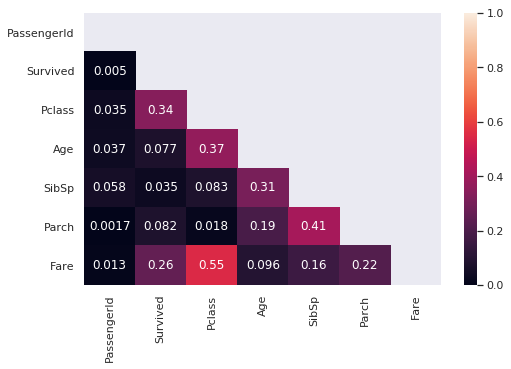

In [76]:
# Correlation heatmap of the numerical variables 
corr  =df.corr().abs()

plt.figure(figsize = (8,5))
heatmap = np.zeros_like(df.corr().abs(), dtype=np.bool)
heatmap[np.triu_indices_from(heatmap)] = True
sns.heatmap(df.corr().abs(), annot=True, mask=heatmap)
plt.show()

There is correlation between : 


*   Pclass and survived
*   Survived and fair
*   Pclass and fair
*   Pclass and age
*   age and sibsp
*   sibsp and parch







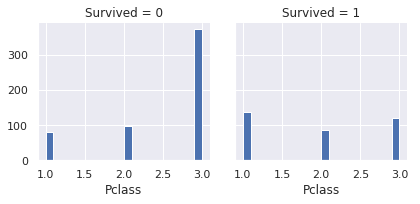

In [77]:
# Plotting a hitogram of Pclass with respect to survival
face = sns.FacetGrid(df, col='Survived')
face.map(plt.hist, 'Pclass', bins=20)
plt.show()

People from third class died more compared to first and second class

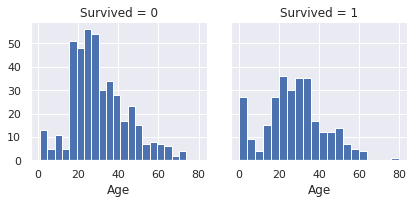

In [78]:
# Plotting a hitogram of Age with respect to survival
face = sns.FacetGrid(df, col='Survived')
face.map(plt.hist, 'Age', bins=20,)
plt.show()

Proportion people that are olderr died more compared to the proportion of people that are younger

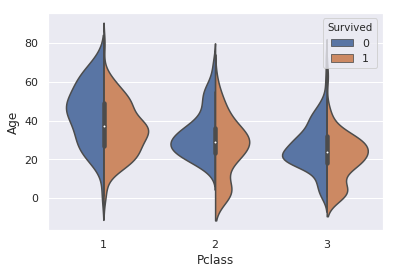

In [79]:
# Plotting a viloin plot of Pclass against Age based on survival
sns.violinplot(data =df,x='Pclass',y='Age',hue='Survived',split=True)
plt.show()

This shows that people that are old and from third class did not survive compared to other classes

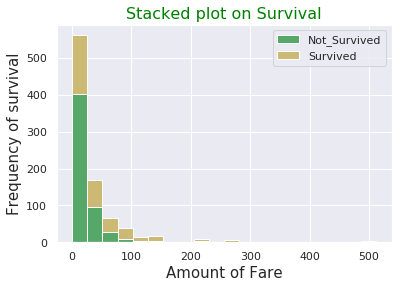

In [80]:
# Plotting a stacked plot of amount of fare based on survival
plt.hist([df[df['Survived']==0]['Fare'],df[df['Survived']==1]['Fare']],stacked=True,color=['g','y'],bins=20,label=['Not_Survived','Survived'])
plt.xlabel("Amount of Fare",fontsize=15)
plt.ylabel("Frequency of survival",fontsize=15)
plt.title("Stacked plot on Survival",fontsize=16,color="green")
plt.legend()
plt.show()

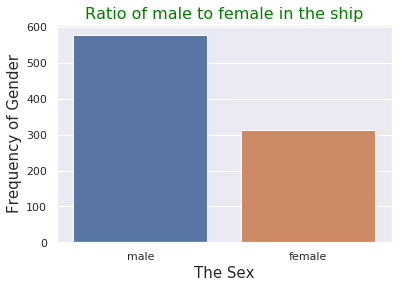

In [81]:
# Plotting a contplot of gender of people in the ship  
sns.countplot(df['Sex'])
plt.xlabel("The Sex",fontsize=15)
plt.ylabel("Frequency of Gender",fontsize=15)
plt.title("Ratio of male to female in the ship",fontsize=16,color="green")
plt.show()

This shows that there more male who borded the ship compared to female

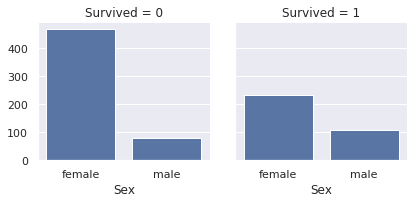

In [82]:
# Plotting a hitogram of Sex with respect to survival
face = sns.FacetGrid(df, col='Survived')
face.map(sns.countplot, 'Sex')
plt.show()

This shows that more female died the occurrence of tragedy compared to male

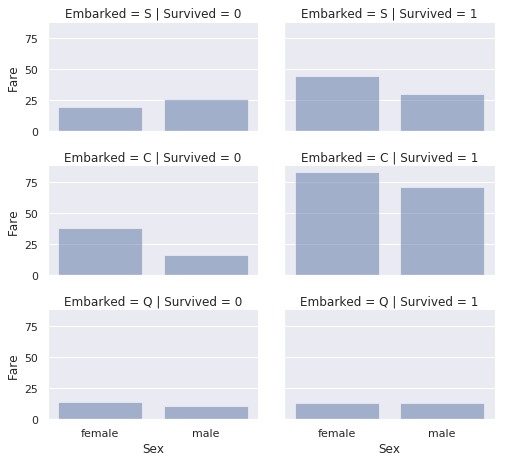

In [83]:
# Plotting a bar plot on station which people came from based on fare and their survival
grid = sns.FacetGrid(df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()
plt.show()

This shows that people from embarked station C and S survived more than those from Q

# Data Cleaning

To avoid repetion of cleaning the train and the test set separately .

I will split the y from the train set  and merge the two dataset using a separator then later split.


In [0]:
y = df['Survived']
train = df.drop('Survived',axis=1)
test = df1

In [0]:
# creating the seapartor
train['separator'] = 0
test['separator'] = 1

In [86]:
# Concatting the train and the test set
tt = pd.concat([train, test])
tt.separator.unique()

array([0, 1])

This tells you that both sets are represented

In [87]:
# checking for null values
tt.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
separator         0
dtype: int64

Cabin has the highest missing value of 1014

In [88]:
tt.Cabin.fillna("U",inplace =True)
tt.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         2
separator        0
dtype: int64

I have replaced the missing value with U meaning unknown 


In [89]:
# Grouping Pclass with the mean of their ages
tt.groupby('Pclass')['Age'].mean().sort_values(ascending=False)

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [90]:
# we have two missing values on embarked hence we fill it with the mode
print("The most common embarked is :",tt.Embarked.mode())
tt['Embarked'].fillna('S',inplace=True)
tt.isnull().sum()

The most common embarked is : 0    S
dtype: object


PassengerId      0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin            0
Embarked         0
separator        0
dtype: int64

In [0]:
# creating a function to fill miising value of age according to the mean of the respective pclass 
def age_approx(cols):
   Age = cols[0]
   Pclass = cols[1]
   if pd.isnull(Age):
       if Pclass == 1:
           return 39
       elif Pclass == 2:
           return 29
       else:
           return 24
   else:
       return Age

In [92]:
#Applying the function on out tt dataset
tt['Age'] = tt[['Age', 'Pclass']].apply(age_approx, axis=1)
tt.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin          0
Embarked       0
separator      0
dtype: int64

In [93]:
# For the fare only one value is missing hence has no any significant weight
tt.dropna(axis=0,inplace=True)
tt.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
separator      0
dtype: int64

Now our dataset has no more missing values

In [94]:
# Checking for duplicates
tt.duplicated().any()

False

There are no duplicates

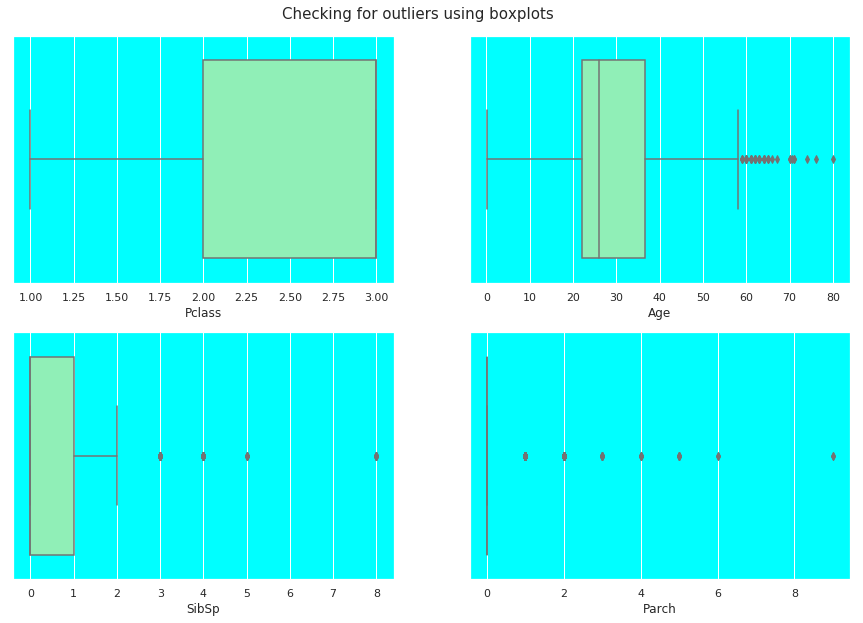

In [95]:
# Checking for outliers
numerical = ['Pclass','Age','SibSp','Parch','Fare']
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
plt.suptitle('Checking for outliers using boxplots', fontsize = 15, y = 0.92)
for ax, data, column in zip(axes.flatten(), tt, numerical):
  sns.boxplot(tt[column], ax = ax,palette = 'rainbow')
  ax.set_facecolor('cyan')

Age Parch and sibsp has outliers but we will not remove them inorder to identify the reasons ato why they exists

In [96]:
# Checking multicollinerity
correlation = tt.corr()
pd.DataFrame(np.linalg.inv(correlation),index =correlation.index,columns=correlation.columns)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,separator
PassengerId,2.882996,0.052469,-0.002300,0.094754,-0.050338,0.006756,-2.322984
Pclass,0.052469,1.791272,0.587700,-0.091330,-0.128456,0.924059,-0.031647
Age,-0.002300,0.587700,1.311829,0.191029,0.083904,0.013067,0.014689
SibSp,0.094754,-0.091330,0.191029,1.224553,-0.386902,-0.202255,-0.030313
Parch,-0.050338,-0.128456,0.083904,-0.386902,1.223836,-0.297085,0.025517
Fare,0.006756,0.924059,0.013067,-0.202255,-0.297085,1.612715,-0.037067
separator,-2.322984,-0.031647,0.014689,-0.030313,0.025517,-0.037067,2.874552


When we look across the diagonal there is no VIF that is nearing 5 or 5 hence there no multicolinearity ,thereis no need to drop any column

# Feature Engineering

**Cabin**

In [97]:
# Replacing the other cabin names with the first letter 
tt['Cabin'] = tt['Cabin'].map(lambda x :x[0])
tt['Cabin'].unique()

array(['U', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

This makes more meaning from the many Cabin letters that were there before

In [98]:
# create dummies from the cabin
Cabin_dummies = pd.get_dummies(tt['Cabin'],prefix = 'Cabin')
ttc = pd.concat([tt,Cabin_dummies],axis=1)
ttc.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,0,0,0,0,0,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0,1,0,0,0,0,0,0
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,0,0,0,0,0,0,0,1


**Name**

In [0]:
# Splitting the name where there is a comma and also stripping when there exist a dot because mostly its the title
titles = set()
for name in ttc['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

In [100]:
#This a distionary of all the titles and their meaning
Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}
# Creating the new columns with the key of the dictionary according to their respective names

ttc['Title'] = ttc['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
ttc['Title'] = ttc.Title.map(Title_Dictionary)

ttc.head(3)    

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Title
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S,0,0,0,0,0,0,0,0,0,1,Mr
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0,0,0,1,0,0,0,0,0,0,Mrs
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S,0,0,0,0,0,0,0,0,0,1,Miss


**Dropping columns that will not be used in modelling**

In [0]:
ttc.drop(['Name','Ticket','Cabin'],inplace=True,axis=1)

**Converting categorical columns into dummies**


In [102]:
ttc = pd.get_dummies(ttc)
ttc.head(3)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,separator,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Officer,Title_Royalty
0,1,3,22.0,1,0,7.2500,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0
1,2,1,38.0,1,0,71.2833,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
2,3,3,26.0,0,0,7.9250,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0


sex ,embarked and title are affected

# Modelling

## KNeighbours classification

In [0]:
# Splitting the dataset into train and test set using separator and later dropping the separator column
train = ttc[ttc.separator == 0]
test = ttc[ttc.separator == 1]

train.drop('separator', axis  = 1, inplace = True)
test.drop('separator', axis  = 1, inplace = True)


**Partition :80 -20 sets**

In [104]:
# Randomly partition each dataset into two parts i.e 80 - 20  sets.

X = train
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.6480446927374302


array([[89, 21],
       [42, 27]])

Partiotion 80 -20 has accuracy of 64 % which seems to be the highest of the three partitions 

**Partition :70 -30 sets**

In [105]:
# Randomly partition each dataset into two parts i.e 70 - 30  sets.

X = train
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.6119402985074627


array([[129,  39],
       [ 65,  35]])

Partition 70 -30 shows a sigmificant decrease in accuracy compared tp 80-20

**Partition :60 -40 sets**

In [124]:
# Randomly partition each dataset into two parts i.e 60 - 40  sets.

X = train
y = y

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 0)
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.6246498599439776


array([[176,  45],
       [ 89,  47]])

Partition 60 -40 shows a sigmificant decrease in accuracy compared tp 80-20 however its better than 70-30

## Optimization of KNeighbours Classifier

In [113]:
# Using randomsearch to get the most optimal parameters
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
clf = KNeighborsClassifier()

params = {'n_neighbors': list(range(1,15)), 
         'weights': ['uniform', 'distance'],
         'p' :[1,2],
         'metric':['minkowski','euclidean','manhattan']}
kfold = KFold(n_splits=5,random_state=0)
rsc = RandomizedSearchCV(clf,params,cv=kfold,random_state=0,verbose=0)
rsc.fit(X_train,y_train)
print(rsc.best_params_)
print(rsc.best_score_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 6, 'metric': 'manhattan'}
0.6530898876404494


Using this optimal parameters.We acquire best accuracy 65%

In [114]:
# Now using we want to check how the accuracy will change with standard scaler and feature reduction using LDA
# Appling standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using most optimal parameters
clf = KNeighborsClassifier(weights = 'distance', p = 2, n_neighbors = 6, metric = 'manhattan')
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.7932960893854749


array([[89, 21],
       [16, 53]])

This improves the accuracy upto 79% which is quite good

# Challenging the solution

In [115]:
# Now we want to challenge the solution using xgboost classifier
# Appling standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using most optimal parameters
clf = XGBClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.8100558659217877


array([[94, 16],
       [18, 51]])

The accuracy increased upto 81%

In [116]:
# Now we want to challenge solution using an ensemble method with adabost classifier
# Appling standard scaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#Applying LDA
lda = LDA(n_components=1)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# Using most optimal parameters
clf = AdaBoostClassifier(RandomForestClassifier(max_depth=5))
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print("The accuracy is : ",accuracy_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

The accuracy is :  0.7541899441340782


array([[81, 29],
       [15, 54]])

This decreased uto 75% hence the best classifier in this case is XGboost with an accuracy of 81%